# LeagueSide Project: Business Operations

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading in data from google sheets into a dataframe

In [2]:
excel_url = "https://docs.google.com/spreadsheets/d/1tV7xETwIZOXdOvwNAMs2Oc29fZkcGbM3tLWfnZdPV5s/edit#gid=1305717896"

url = excel_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [3]:
# read in data
df = pd.read_csv(url)
df.head(5)

,deadline,Account Manager,Capability Type,Deadline Name,League ID,Campaign ID,Verification Status
0,2021-09-13,Melissa,Website banners,Upload web banner to website,418,684,Verified
1,2021-09-13,Melissa,Website banners,Upload web banner to website,16205,684,Verified
2,2021-09-13,Asha,Website banners,Upload web banner to website,537,1181,Overdue
3,2021-09-14,Melissa,Website banners,Upload web banner to website,14296,684,Verified
4,2021-09-14,Melissa,Website banners,Upload web banner to website,10943,684,Verified


### Checking for duplicates or null/missing values

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

deadline               0
Account Manager        0
Capability Type        0
Deadline Name          0
League ID              0
Campaign ID            0
Verification Status    0
dtype: int64

# 1a:  Current overall percentage of items that are ‘Verified’

In [6]:
df['Verification Status'].value_counts()

Not Yet Due    173
Verified       152
Overdue         66
Name: Verification Status, dtype: int64

In [7]:
sum(df['Verification Status']=='Verified') /  df['Verification Status'].count() * 100

38.87468030690537

**38.87 percent of items are 'Verified'**

# 1b: Our verification percentage by Capability Type	
<a id='count-by-capability'></a>

In [8]:
df.groupby('Capability Type')['Capability Type'].count().sort_values(ascending=False)



Capability Type
Game signage                            136
Dedicated email or social media post     83
Giveaways                                69
Teams of Game Jerseys                    63
Website banners                          40
Name: Capability Type, dtype: int64

**Game signage is our biggest category by number of items**


In [9]:
#creates a series grouped by capability type and verifcation status
capability_df = df.groupby(['Capability Type', 'Verification Status'])['Verification Status'].count()
capability_df

Capability Type                       Verification Status
Dedicated email or social media post  Not Yet Due            30
                                      Overdue                16
                                      Verified               37
Game signage                          Not Yet Due            75
                                      Overdue                14
                                      Verified               47
Giveaways                             Not Yet Due             8
                                      Overdue                26
                                      Verified               35
Teams of Game Jerseys                 Not Yet Due            45
                                      Overdue                 6
                                      Verified               12
Website banners                       Not Yet Due            15
                                      Overdue                 4
                                      Verified

In [10]:
# store the unique values for each column
col1 = df['Capability Type'].unique()
col2 = df['Verification Status'].unique()

In [11]:
# function to loop through and calculate percentages for each group so that we don't have to manually calculate

group_plot = {}

for val1 in col1:
    group_total = 0
    group_verified = 0
    
    for val2 in col2:     
        if val2 == 'Verified':
            group_total += capability_df.loc[val1, val2]
            group_verified += capability_df.loc[val1, val2]
        else:
            group_total += capability_df.loc[val1, val2]
    
    calculation = round(group_verified / group_total * 100, 2)
    group_plot[val1] = calculation # store in dictionary - to be used for a plot
    print(f"The Verification percentage for {val1} is {calculation}%")
    

The Verification percentage for Website banners is 52.5%
The Verification percentage for Game signage is 34.56%
The Verification percentage for Dedicated email or social media post is 44.58%
The Verification percentage for Giveaways is 50.72%
The Verification percentage for Teams of Game Jerseys is 19.05%


# 1c: Additional Metric

<a id='account'></a>

In [12]:
manager_items = dict(df['Account Manager'].value_counts())
manager_items

{'Melissa': 167,
 'Charlie': 88,
 'Antonio': 65,
 'Asha': 38,
 'Darien': 28,
 'Julia': 5}

Interesting, **Melissa** is taking on many more item deadlines than others. Almost, double the second highest person. 

Additionally, Julia only has 5 items she is working on. Let's explore a little more



In [13]:
#creates a series grouped by Account Manager
account = df.groupby(['Account Manager', 'Verification Status'])['Verification Status'].count()

In [14]:
col1 =df['Account Manager'].unique()
col2 = df['Verification Status'].unique()

manager_numbers = {}

for val1 in col1:
    Manager_Items = 0
    group_verified = 0
    
    for val2 in col2:     
        if val2 == 'Verified':
            Manager_Items += account.loc[val1, val2]
            group_verified += account.loc[val1, val2]
        else:
            Manager_Items += account.loc[val1, val2]
    
    calculation = round(group_verified / Manager_Items * 100, 2)
    
    manager_numbers[val1] = calculation # store in dictionary - to be used for a plot
    
    print(f"Of those items assigned ({Manager_Items}), {val1} has verified {calculation}% of them")
    

Of those items assigned (167), Melissa has verified 41.92% of them
Of those items assigned (38), Asha has verified 39.47% of them
Of those items assigned (65), Antonio has verified 36.92% of them
Of those items assigned (88), Charlie has verified 40.91% of them
Of those items assigned (28), Darien has verified 21.43% of them
Of those items assigned (5), Julia has verified 20.0% of them


# 1d/ 2: Briefing the Team, Analyzing, and Strategizing

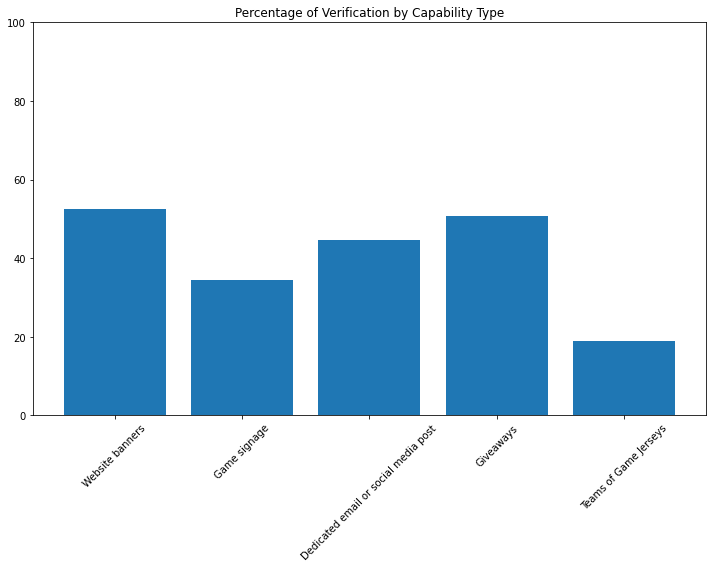

In [15]:
plt.figure(figsize=[10, 8])
plt.bar(group_plot.keys(), group_plot.values())
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 110, 20))
plt.title("Percentage of Verification by Capability Type")
plt.tight_layout()

In [16]:
manager_numbers

{'Melissa': 41.92,
 'Asha': 39.47,
 'Antonio': 36.92,
 'Charlie': 40.91,
 'Darien': 21.43,
 'Julia': 20.0}

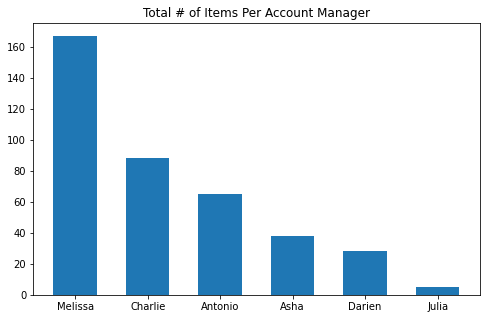

In [17]:
plt.figure(figsize=[8,5])
plt.bar(manager_items.keys(), manager_items.values(), 0.6, label='Items')
plt.title("Total # of Items Per Account Manager")
plt.show()

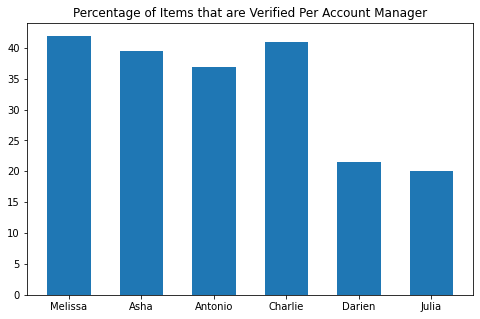

In [18]:
plt.figure(figsize=[8,5])
plt.bar(manager_numbers.keys(), manager_numbers.values(), 0.6, label='Percentage Verified')
plt.title("Percentage of Items that are Verified Per Account Manager")
plt.show()

Currently, overall we have collected only 38.87% of the total 391 verifications. As revealed by the graph above, "Teams of Game Jerseys" items are significantly lagging behind in verifications percentage wise. With that being said it might be wise to focus our team efforts on targeting "Game signage." Not only is gamesignage lagging behind percentage wise but it also makes up our biggest category by overall number of items at [136 items](#count-by-capability). I suggest we look into what is causing the delays and allocate our time and resources towards this category. 

There also appears to be a big discrepancy in the assignment of items to our various account managers. Some of our account managers are taking on an insane load of work. Shoutout to [Melissa](#account) for being a go-getter. She is not only taking on a large number of items but also has the highest percentage of verifications out of all our account managers. We definitely should give her additional help and spread her work out to other account managers who do not have as much assigned to them. A more even distribution of the work should help us reach our goal of 90% of items “Verified." 

In the future, we should take a look into ways to make the verification process more efficient for item deadlines categorized as "game signage". Additionally, we should ask: what led to such a lopsided allocation of work for our account managers? Are there certain distribution processes that aren't working? Do we need to provide more training for certain account managers to help them succeed? We should take the time to seriously improve our business processes as one account manager should never have that much assigned to him/her. 